# EDA on Communities and Offences Dataset

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Load dataset
cleaned_communities = pd.read_csv('../cleanedCsv/cleanedCommunities.csv')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/cbook.py:1762: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/collections.py:197: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  offsets = np.asanyarray(offsets, float)


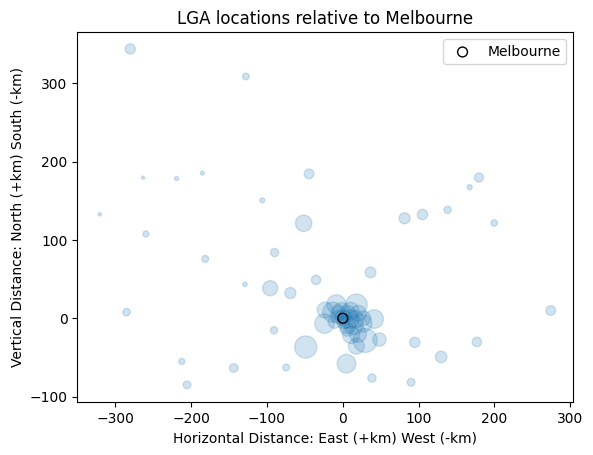

In [5]:
# Visualise positions of the LGAs relative to Melbourne
lga_grouped = cleaned_communities.groupby('LGA')

data = []

for lga, group in lga_grouped:
  x, y, population = group['Location_x'], group['Location_y'], group['2012 ERP, total']
  data.append([x, y, population])

data = pd.DataFrame(data, columns=['Location_x', 'Location_y', 'population'])

# Plot scatter ploit
plt.scatter(data['Location_x'], data['Location_y'], s=list(data['population']/1000), alpha=0.2)
plt.ylabel('Vertical Distance: North (+km) South (-km)')
plt.xlabel('Horizontal Distance: East (+km) West (-km)')
plt.title('LGA locations relative to Melbourne')

# Plot Melbourne
plt.scatter(0, 0, facecolors='none', edgecolors='black', s=50, linewidth=1, label='Melbourne')
plt.legend()
plt.show()

2007 ERP, total
count        66.000000
mean     103079.544318
std       72206.203103
min        5262.000000
25%       39751.858216
50%       92609.876476
75%      150902.008857
max      295224.734158
Name: 2007 ERP, total, dtype: float64

2012 ERP, total
count        66.000000
mean      91689.287879
std       70053.486883
min        5262.000000
25%       31400.750000
50%       75142.000000
75%      146676.500000
max      298909.000000
Name: 2012 ERP, total, dtype: float64


/var/folders/19/534nl8853rg0sycn60dtsltr0000gn/T/ipykernel_3556/4041986365.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([populations_2007, populations_2012], labels=['2007 ERP, total', '2012 ERP, total'])


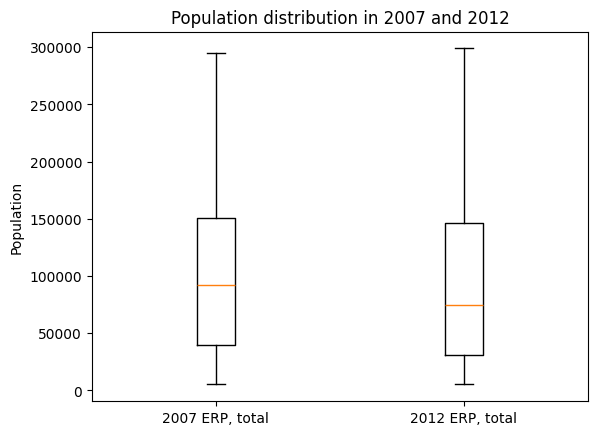

In [6]:
# Investigate estimated population in 2007 and 2012
populations_2007 = cleaned_communities['2007 ERP, total']
populations_2012 = cleaned_communities['2012 ERP, total']

print('2007 ERP, total')
print(populations_2007.describe())

print('\n2012 ERP, total')
print(populations_2012.describe())

fig, ax = plt.subplots()
ax.boxplot([populations_2007, populations_2012], labels=['2007 ERP, total', '2012 ERP, total'])
plt.ylabel('Population')
plt.title('Population distribution in 2007 and 2012')
plt.show()

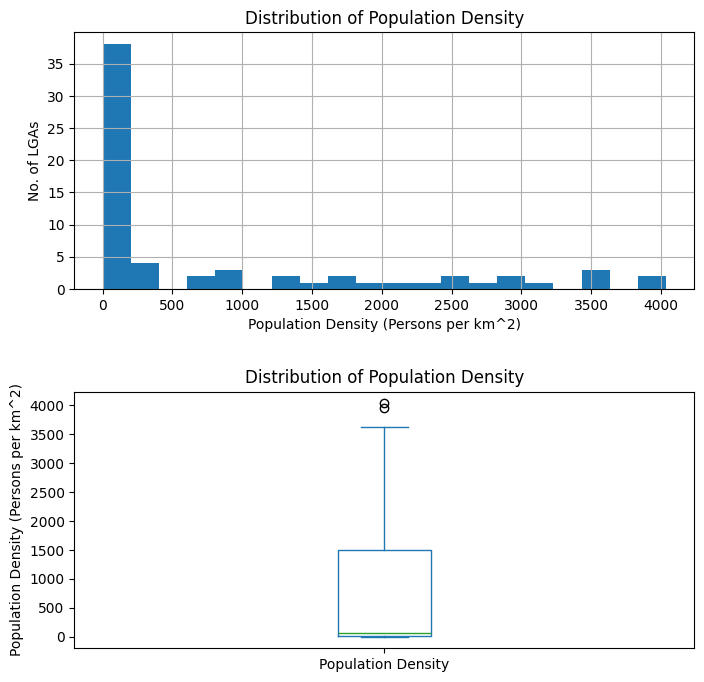

52    stonnington
63          yarra
Name: LGA, dtype: object


In [17]:
# Calculate the population density
cleaned_communities['Population Density'] = cleaned_communities['Population'] / cleaned_communities['Area (km^2)']

fig, axes = plt.subplots(2, 1, figsize=(8, 8))

# Plot population density as a histogram
cleaned_communities['Population Density'].hist(bins=20, ax=axes[0])

axes[0].set_xlabel('Population Density (Persons per km^2)')
axes[0].set_ylabel('No. of LGAs')
axes[0].set_title('Distribution of Population Density')

# Plot population density as a box plot
cleaned_communities['Population Density'].plot(kind='box', ax=axes[1])

axes[1].set_ylabel('Population Density (Persons per km^2)')
axes[1].set_title('Distribution of Population Density')

plt.subplots_adjust(hspace=0.4)
plt.show()

# Get scatter plot outliers
Q1 = cleaned_communities['Population Density'].quantile(0.25)
Q3 = cleaned_communities['Population Density'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = cleaned_communities['Population Density'][(cleaned_communities['Population Density'] < lower_bound) | (cleaned_communities['Population Density'] > upper_bound)]

# Print outlier LGAs
outlier_rows = cleaned_communities.loc[outliers.index]
print(outlier_rows['LGA'])


In [8]:
# # Correlation between population density and access to social services, e.g. hospitals, schools, etc.
# correlation_matrix = cleaned_communities[['Population Density', 'Presentations to emergency departments, 2012-13', 'Travel time to GPO (minutes)']].corr()
# print(correlation_matrix)

In [9]:
# densities = cleaned_communities['Population Density'].sort_values()
# densities.plot(kind='bar')
# plt.ylabel('Population Density')
# plt.title('Population Density by LGA')
# plt.show()

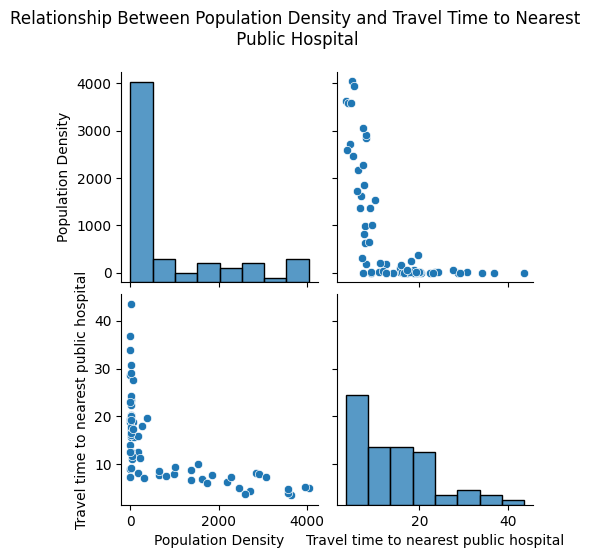

Spearman correlation:


,Population,Travel time to nearest public hospital
Population,1.000000,-0.512953
Travel time to nearest public hospital,-0.512953,1.000000


In [10]:
import seaborn as sns

# Plot relationship between population density and travel time to nearest public hospital
sns.pairplot(cleaned_communities[['Population Density', 'Travel time to nearest public hospital']])
plt.suptitle("Relationship Between Population Density and Travel Time to Nearest\n Public Hospital", y=1.1)
plt.show()

print('Spearman correlation:')
cleaned_communities[['Population', 'Travel time to nearest public hospital']].corr(method='spearman')

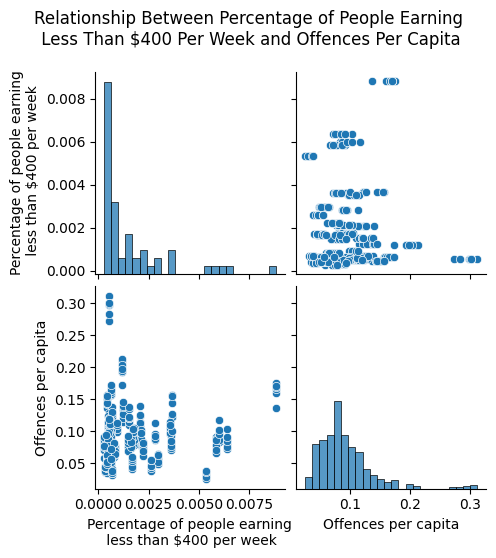

,Percentage of people earning\n less than $400 per week,Offences per capita
Percentage of people earning\n less than $400 per week,1.000000,0.062966
Offences per capita,0.062966,1.000000


In [11]:
# Plot relationship between low income percentage and offences per capita
joined_data = pd.read_csv('final.csv')

joined_data['Percentage of people earning\n less than $400 per week'] = joined_data['Personal income <$400/week, persons'] / joined_data['Population'] * 100
joined_data['Offences per capita'] = joined_data['Offence Count'] / joined_data['Population']
sns.pairplot(joined_data[['Percentage of people earning\n less than $400 per week', 'Offences per capita']])
plt.suptitle("Relationship Between Percentage of People Earning\n Less Than $400 Per Week and Offences Per Capita", y=1.1)
plt.show()

# Calculate correlation
joined_data[['Percentage of people earning\n less than $400 per week', 'Offences per capita']].corr()